<p style="font-family: Arial; font-size:2.5em;color:crimson;">
    <b>4) Modeling(Machine Learning)</b> 
 </p> 

### Normalization
    - We defined a function named Normalization for normalizing data. We used MinMaxScalar in this function. 

In [35]:
def Normalization(df,lst,rng) :
    ''' inputs
    df : the data frame that should be normal
    lst : list of columns of df that should be normal
    rng : the range of normalization 
    
        output
    df : normalized df_in  '''
    
    scaler = preprocessing.MinMaxScaler(feature_range = rng)
    df[lst] = scaler.fit_transform(df[lst])
    return df

### Four functions for different classification algorithms and their evaluation

## Logistic Regression Model

In [36]:
def LogReg(x,y,test_size,stratify) :
    ## Fist x and y split for train and test,then model is created and fit
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=0,stratify=stratify)
    Model = LogisticRegression(solver='liblinear')
    Model.fit(x_train,y_train.ravel())
    ## report of model evaluation is printed
    print('Accuracy of Logistic Regression Model: ' , np.round(metrics.accuracy_score(y_test,Model.predict(x_test)),3))
    Evaluation(Model,x,y,x_train,y_train,x_test,y_test)
    print('*'*120)

## Naive Bayes Model

In [37]:
def NaiveBayes(x,y,test_size,model,stratify) : ## Nive Bayes have 4 algorithms,The function takes it as an argument.  
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=0,stratify=stratify)
    Model = model()
    Model.fit(x_train,y_train.ravel())
    print('Accuracy of Model: ' , np.round(metrics.accuracy_score(y_test,Model.predict(x_test)),3))
    Evaluation(Model,x,y,x_train,y_train,x_test,y_test)
    print('*'*120)

## KNN Model

In [38]:
def KNN(x,y,test_size,k,stratify) :
    ## The function takes k as argument, these lists stores scores of k iterations of running knn algorithms
    train_score = []
    test_score = []
    best_k = 0
    best_score = 0
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=0,stratify=stratify)
    
    for i in range (1,k+1) :
        Model = KNeighborsClassifier(i)
        Model.fit(x_train,y_train.ravel())
        train_score.append(np.round(Model.score(x_train,y_train),3))
        test_score.append(np.round(Model.score(x_test,y_test),3))
        
    best_k = test_score.index(max(test_score))+1
    best_score = max(test_score)
    Model = KNeighborsClassifier(best_k)
    Model.fit(x_train,y_train.ravel())
    
    print('Model accuracy for k = %d : '%k , np.round(test_score,3))
    print('The best result is for k = %d with accuracy = %s .'%(best_k,best_score))
    Evaluation(Model,x,y,x_train,y_train,x_test,y_test)
    
    plt.plot(range(1,k+1),train_score,color='darkblue',label='train_accuracy')
    plt.plot(range(1,k+1),test_score,color='darkorange',label='test_accuracy')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    print('*'*120)

## Evaluation Function

In [39]:
def Evaluation(Model,x,y,x_train,y_train,x_test,y_test) :
    cv_score = (cross_val_score(Model, x_train, y_train.ravel(), cv = StratifiedKFold(10), scoring='accuracy')).mean()
    print('Train score : ',np.round(Model.score(x_train,y_train),3))
    print('Average Cross Validation Score : ',np.round(cv_score,3))
    print('jaccard_score : ',np.round(jaccard_score(y_test,Model.predict(x_test)),3))
    print('precision_score : ',np.round(precision_score(y_test,Model.predict(x_test)),3))
    print('recall_score : ',np.round(recall_score(y_test,Model.predict(x_test)),3))
    print('f1_score : ',np.round(f1_score(y_test,Model.predict(x_test)),3))
    print('Result of confusion matrix : ')
    print(confusion_matrix(y_test,Model.predict(x_test)))

## Test 1) Create and Evaluate Models on normalized data ( just 5 features ) 

Accuracy of Logistic Regression Model:  0.962
Train score :  0.948
Average Cross Validation Score :  0.949
jaccard_score :  0.558
precision_score :  0.96
recall_score :  0.571
f1_score :  0.716
Result of confusion matrix : 
[[457   1]
 [ 18  24]]
************************************************************************************************************************
Result of Gaussian Model : 
Accuracy of Model:  0.89
Train score :  0.884
Average Cross Validation Score :  0.883
jaccard_score :  0.276
precision_score :  0.382
recall_score :  0.5
f1_score :  0.433
Result of confusion matrix : 
[[424  34]
 [ 21  21]]
************************************************************************************************************************
Result of Complement Model : 
Accuracy of Model:  0.79
Train score :  0.772
Average Cross Validation Score :  0.772
jaccard_score :  0.216
precision_score :  0.24
recall_score :  0.69
f1_score :  0.356
Result of confusion matrix : 
[[366  92]
 [ 13  29]]
***

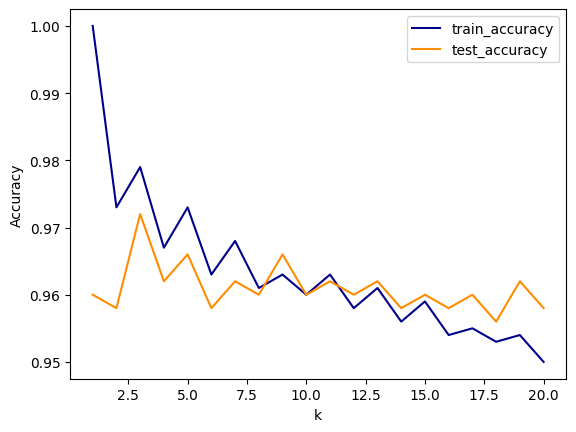

************************************************************************************************************************


In [40]:
#################### df normalization ######################
df_Normal1 = df.copy()
features1 = ['Age','Experience','Income','CCAvg','Mortgage']
df_Normal1 = Normalization(df_Normal1,features1,(1,5))
#################### x,y ##############################
x = df_Normal1.drop('Personal Loan',axis=1)
y = df_Normal1['Personal Loan'].values.reshape(-1,1)
###########################################################
## Logistic Regression
LogReg(x,y,0.1,None)

## NaiveBayes
print('Result of Gaussian Model : ')
NaiveBayes(x,y,0.1,GaussianNB,None)
print('Result of Complement Model : ')
NaiveBayes(x,y,0.1,ComplementNB,None)
print('Result of Multinomial Model : ')
NaiveBayes(x,y,0.1,MultinomialNB,None)
print('Result of Bernoulli Model : ')
NaiveBayes(x,y,0.1,BernoulliNB,None)

## KNN
print('Result of KNN Model : ')
KNN(x,y,0.1,20,stratify=None)

## Description of results
### Note :
#### TP = True Positive => Actual(y_test) = 1 , Predicted = 1 
#### TN = True Negative => Actual(y_test) = 0 , Predicted = 0
#### FP = False Positive => Actual(y_test) = 0 , Predicted = 1 
#### FN = True Negative => Actual(y_test) = 1 , Predicted = 0 
    - Cross-validation was done in 10 folds; scores were close together in the folds, and as seen in reports, the results didn't improve models.
    - Knn model is the best model and after that LogisticRegression is the model with good results.
    - As shown on the plot of train_accuracy and test_accuracy related to Knn model, train accuracy is 1 in k = 1 and decreases by increasing k; test accuracy is changing in range (0.956–0.972); and the best score is 0.972 in k = 3, so there is just a 0.007 difference with train accuracy.
    - knn is the best in all of evaluation metrics.
    - In classification models, the confusion matrix is really important besides accuracy and scores. TP and FN are so important in this dataset because the bank wants to give loans to those who can be granted them, and if our model predicts many FN, the bank will lose. as seen above, Knn has the best results in the confusion matrix. Tp = 28, TN = 458, FP = 0, FN = 14. 

## Test 2) Create and Evaluate 6 Models on normalized data (  just 5 features ) with stratify 
    - Because we deal with an imbalance dataset in target, we set 'stratify' parameter in 'train_test_split' to 'y' we use stratified sampling here to ensure that the train and test data have the same proportion of class labels.

Accuracy of Logistic Regression Model:  0.944
Train score :  0.95
Average Cross Validation Score :  0.948
jaccard_score :  0.472
precision_score :  0.833
recall_score :  0.521
f1_score :  0.641
Result of confusion matrix : 
[[447   5]
 [ 23  25]]
************************************************************************************************************************
Result of Gaussian Model : 
Accuracy of Model:  0.888
Train score :  0.883
Average Cross Validation Score :  0.883
jaccard_score :  0.333
precision_score :  0.438
recall_score :  0.583
f1_score :  0.5
Result of confusion matrix : 
[[416  36]
 [ 20  28]]
************************************************************************************************************************
Result of Complement Model : 
Accuracy of Model:  0.766
Train score :  0.776
Average Cross Validation Score :  0.776
jaccard_score :  0.24
precision_score :  0.259
recall_score :  0.771
f1_score :  0.387
Result of confusion matrix : 
[[346 106]
 [ 11  37]]


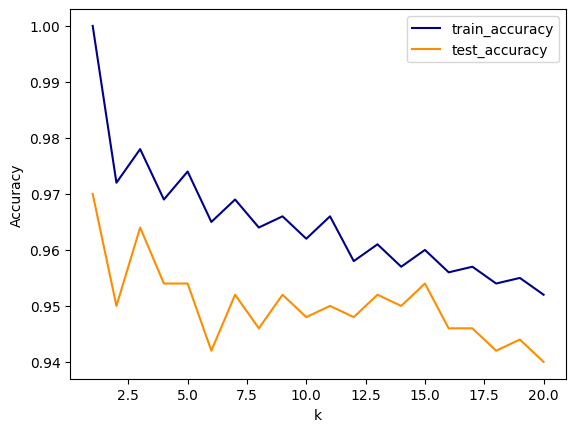

************************************************************************************************************************


In [41]:
#################### x,y ##############################
x = df_Normal1.drop('Personal Loan',axis=1)
y = df_Normal1['Personal Loan'].values.reshape(-1,1)
###########################################################
## Logistic Regression
LogReg(x,y,0.1,y)

## NaiveBayes
print('Result of Gaussian Model : ')
NaiveBayes(x,y,0.1,GaussianNB,y)
print('Result of Complement Model : ')
NaiveBayes(x,y,0.1,ComplementNB,y)
print('Result of Multinomial Model : ')
NaiveBayes(x,y,0.1,MultinomialNB,y)
print('Result of Bernoulli Model : ')
NaiveBayes(x,y,0.1,BernoulliNB,y)

## KNN
print('Result of KNN Model : ')
KNN(x,y,0.1,20,stratify=y)

### Description of results
    - Knn model is the best model with good results again. 
    - test accuracy is changing in range (0.94–0.97); and the best score is 0.97 in k = 1, so there is just a 0.03 difference with train accuracy.
    - The difference between result of this model and previous model is in confusion matrix result that is really important. TP in this model is 35 that is greater than previous TP(28) and FN is 13 that is smaller than previous FN(14).

## Test 3) create and evaluate 6 Models on normalized data ( all features ) with stratify 

Accuracy of Logistic Regression Model:  0.946
Train score :  0.95
Average Cross Validation Score :  0.948
jaccard_score :  0.481
precision_score :  0.862
recall_score :  0.521
f1_score :  0.649
Result of confusion matrix : 
[[448   4]
 [ 23  25]]
************************************************************************************************************************
Result of Gaussian Model : 
Accuracy of Model:  0.888
Train score :  0.883
Average Cross Validation Score :  0.883
jaccard_score :  0.333
precision_score :  0.438
recall_score :  0.583
f1_score :  0.5
Result of confusion matrix : 
[[416  36]
 [ 20  28]]
************************************************************************************************************************
Result of Complement Model : 
Accuracy of Model:  0.764
Train score :  0.768
Average Cross Validation Score :  0.765
jaccard_score :  0.248
precision_score :  0.264
recall_score :  0.812
f1_score :  0.398
Result of confusion matrix : 
[[343 109]
 [  9  39]]

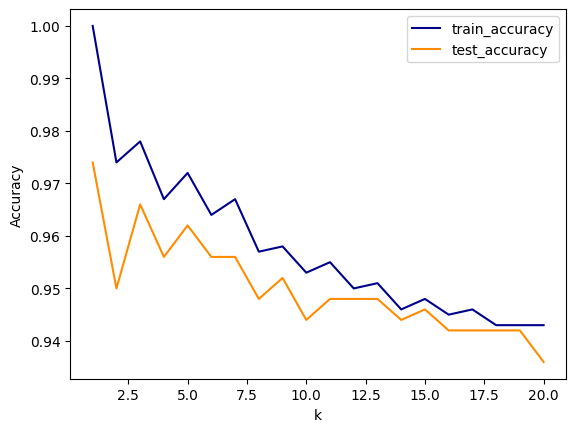

************************************************************************************************************************


In [42]:
#################### df normalization ######################
df_Normal2 = df.copy()
features2 = ['Age','Experience','Income','Family',
           'CCAvg','Education','Mortgage','Securities Account','CD Account','Online'
           ,'CreditCard']
df_Normal2 = Normalization(df_Normal2,features2,(1,5))
#################### x,y ##############################
x = df_Normal2.drop('Personal Loan',axis=1)
y = df_Normal2['Personal Loan'].values.reshape(-1,1)
###########################################################
## Logistic Regression
LogReg(x,y,0.1,y)

## NaiveBayes
print('Result of Gaussian Model : ')
NaiveBayes(x,y,0.1,GaussianNB,y)
print('Result of Complement Model : ')
NaiveBayes(x,y,0.1,ComplementNB,y)
print('Result of Multinomial Model : ')
NaiveBayes(x,y,0.1,MultinomialNB,y)
print('Result of Bernoulli Model : ')
NaiveBayes(x,y,0.1,BernoulliNB,y)

## KNN
print('Result of KNN Model : ')
KNN(x,y,0.1,20,stratify=y)

### Description of results
    - We normalized all features, created and evaluated 6 models. As we see Knn is the best again. Reports of Knn model shows that the number of FN decreased and the number of TP increased. FN = 11, TP = 37. Also accuracy is 0.974 and f1_score is 0.851. We consider this model as the final model.

# Final Model
## The best Model is KNN for this dataset with Accuracy = 0.974 and f1-score = 0.851

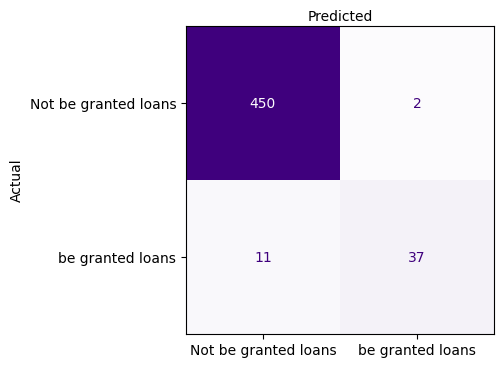

In [43]:
x = df_Normal2.drop('Personal Loan',axis=1).values
y = df_Normal2['Personal Loan'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0,stratify=y)

k = 1
Model = KNeighborsClassifier(k)
Model.fit(x_train,y_train.ravel())
y_pred = Model.predict(x_test)


fig, ax = plt.subplots(figsize=(4, 4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels = ['Not be granted loans', 'be granted loans'])
cm_display.plot(ax=ax,colorbar=False, cmap='Purples')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_label_position('top')
plt.show()

### Convert train data, test data and predicted data to data frame just for visualization

In [44]:
df_train = pd.DataFrame(x_train,columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage',
                                         'Securities Account','CD Account','Online','CreditCard'])
df_train.insert(11,'Personal Loan',y_train)

df_test = pd.DataFrame(x_test,columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage',
                                         'Securities Account','CD Account','Online','CreditCard'])
df_test.insert(11,'Personal Loan',y_test)

df_pred = pd.DataFrame(x_test,columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage',
                                         'Securities Account','CD Account','Online','CreditCard'])
df_pred.insert(11,'Personal Loan',y_pred)

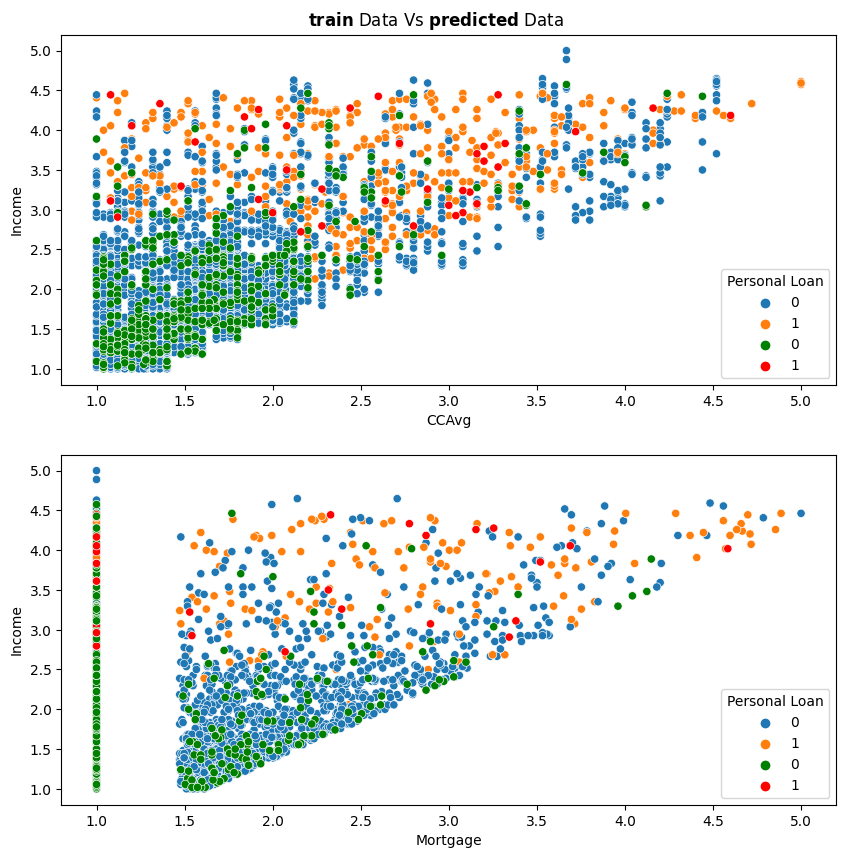

In [45]:
fig = plt.figure(figsize=(10,10))
fig.suptitle(f'$\\mathbf{{{"train"}}}$ Data Vs $\\mathbf{{{"predicted"}}}$ Data',y=0.905)
for i,feature in enumerate(['CCAvg','Mortgage']) :
    plt.subplot(2,1,i+1)
    sns.scatterplot(data=df_train, x=feature,y='Income',hue='Personal Loan')
    sns.scatterplot(data=df_pred, x=feature,y='Income',hue='Personal Loan',palette = ['Green','Red'])

plt.show()

    As shown in the two plots above, blue and orange points are personal loans of train data, and green and red points are predicted data. The plots show that predicted points are in the same range as train points and are not outliers; they also show that red points are predicted for higher incomes and green points are predicted for lower incomes. (As seen before, by increasing income, the chance of being granted loans increases, so personal loan = 1)

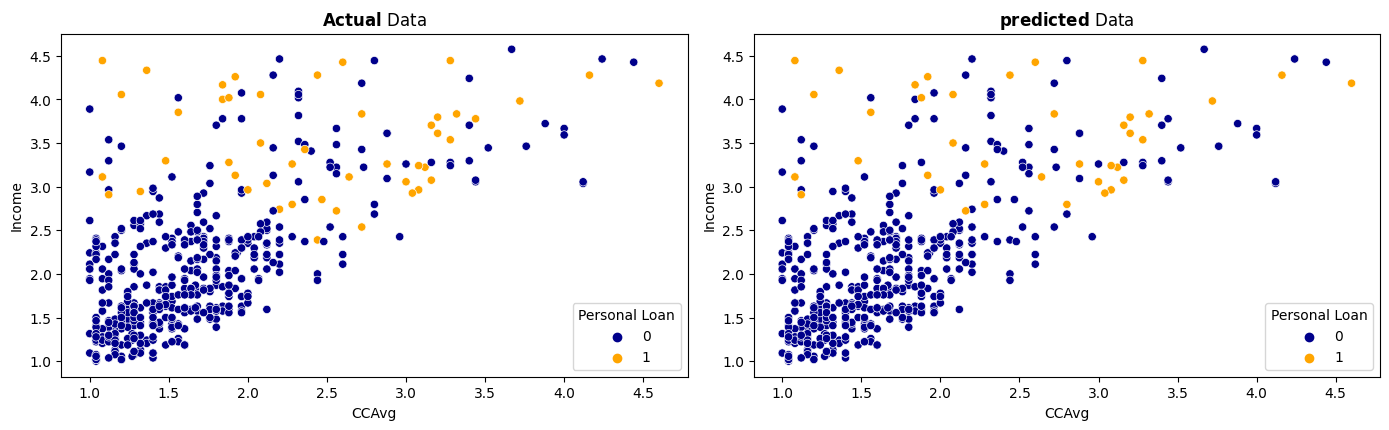

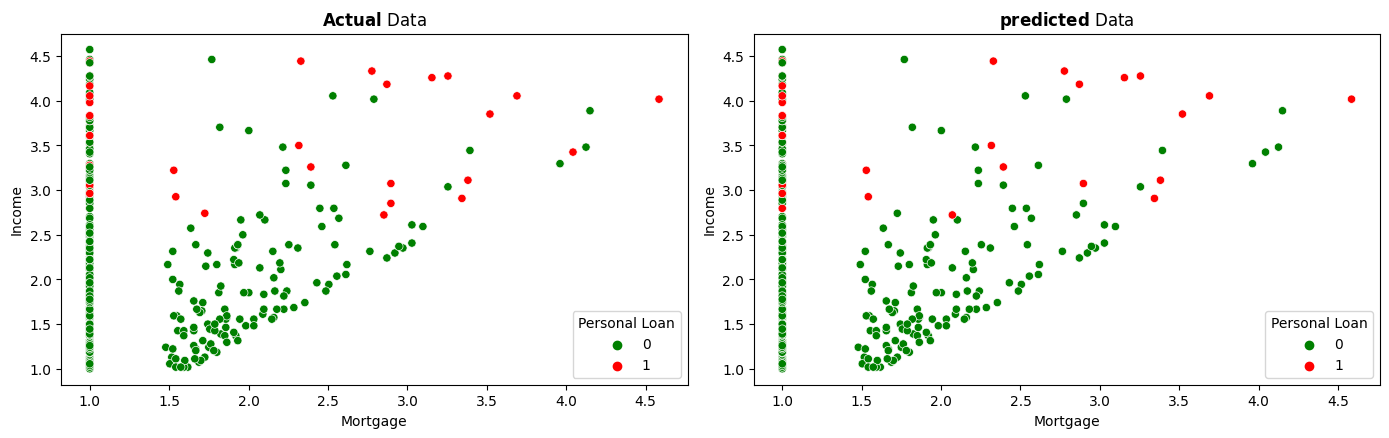

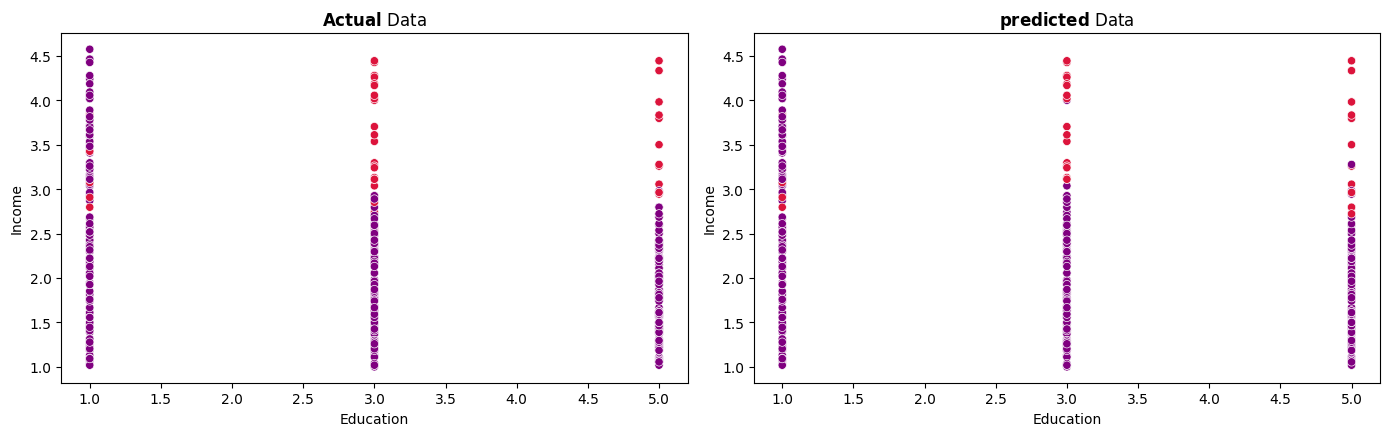

In [46]:
rows = 3
cols = 2
colors = [['darkblue','orange'],['Green','red'],['purple','crimson']]

for j,feature in enumerate(['CCAvg','Mortgage','Education']) :
    plt.figure(figsize=(14,12))
    plt.subplot(rows,cols,j*2+1)
    sns.scatterplot(data=df_test, x=feature,y='Income',hue='Personal Loan',palette = colors[j])
    plt.title(f'$\\mathbf{{{"Actual"}}}$ Data')
    if j == 2 :
        plt.legend([],[], frameon=False)
    plt.subplot(rows,cols,j*2+2)
    sns.scatterplot(data=df_pred, x=feature,y='Income',hue='Personal Loan',palette = colors[j])
    plt.title(f'$\\mathbf{{{"predicted"}}}$ Data')
    if j == 2 :
        plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.show()

    - As seen in the above plots, actual data and predicted data for four features are shown. Plots in each row are different in some points' colors. It means that some points in the predicted plots were predicted incorrectly.

In [47]:
fig = px.scatter_3d(df_test, x='CCAvg', y='Income', z='CD Account',
              color='Personal Loan')

fig.update_layout(
 annotations=[
        dict(
            x=0.47,
            y=0.78,
            
            text="Actual Value",
            textangle=0,
            ax=-90,
            ay=0,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),])

fig.show()

#######################################################################
fig = px.scatter_3d(df_pred, x='CCAvg', y='Income', z='CD Account',
              color='Personal Loan')
fig.update_layout(
 annotations=[
        dict(
            x=0.47,
            y=0.78,
            
            text="Incorrect Predicted Value",
            textangle=0,
            ax=-130,
            ay=0,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),])
fig.show()